In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def correct_evident_opposite(r, s, a):
    return r * (r + s) * (math.sin(a) ** 2) > (s + 2 * r - 1) * (s + 2 * r) * (math.sin(a / 2) ** 2)

def correct_evident_nonopposite(r, s, a):
    return (((math.cos(a) - 1) * (2 * r - s) + 1) ** 2) + (s ** 2) * (math.sin(a) ** 2) < 1

In [3]:
total_probs = 1000

def get_color(r, s, is_correct):
    alphas = np.linspace(0, 2 * math.pi, total_probs)
    correct = 0
    for a in alphas:
        if is_correct(r, s, a):
            correct += 1
    return correct / total_probs

In [4]:
points_count = 100
rs = np.linspace(0, 2, points_count)
ss = np.linspace(0, 2, points_count)

count = 0

def get_colors(is_correct):
    @np.vectorize
    def get_col_by_number(i, j):
        global count

        count += 1
        if count % 1000 == 0:
            print('Processed {0} points'.format(count))

        r = rs[i]
        s = ss[j]

        return get_color(r, s, is_correct)
    
    return get_col_by_number

colors = np.fromfunction(get_colors(correct_evident_nonopposite), (points_count, points_count), dtype=int)

Processed 1000 points
Processed 2000 points
Processed 3000 points
Processed 4000 points
Processed 5000 points
Processed 6000 points
Processed 7000 points
Processed 8000 points
Processed 9000 points
Processed 10000 points


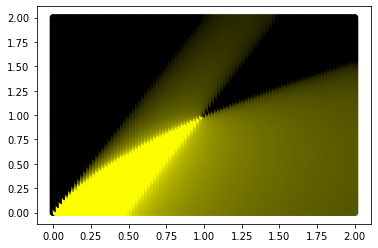

In [5]:
cols = [
    (cur_col, cur_col, 0.)
    for cur_col in np.ravel(np.asarray(colors))
]
plt.scatter(np.repeat(rs, points_count), np.tile(ss, points_count), c=cols)